In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import riskfolio as rp

# Date range
start = '2019-12-30'
end = '2024-07-24'

# Tickers of assets
# assets = ['SPY', 'TLT', 'GLD']
assets = ['SPY']
assets.sort()

# Tickers of factors
factors = ['MTUM', 'QUAL', 'VLUE', 'SIZE', 'USMV']
factors.sort()

tickers = assets + factors
tickers.sort()

# Downloading the data
data = yf.download(tickers, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = tickers
returns = data.pct_change().dropna()

Y = returns[assets]
X = returns[factors]

# Creating the Portfolio Object
port = rp.Portfolio(returns=Y)

# To display dataframes values in percentage format
pd.options.display.float_format = '{:.4%}'.format

# Choose the risk measure
rm = 'MSV'  # Semi Standard Deviation

# Estimate inputs of the model (historical estimates)
method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

mu = port.mu
cov = port.cov

# Estimate the portfolio that maximizes the risk adjusted return ratio
w1 = port.optimization(model='Classic', rm=rm, obj='Sharpe', rf=0.0, l=0, hist=True)

# Estimate points in the efficient frontier mean - semi standard deviation
ws = port.efficient_frontier(model='Classic', rm=rm, points=20, rf=0, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

# Estimate the risk parity portfolio for semi standard deviation
w2 = port.rp_optimization(model='Classic', rm=rm, rf=0, b=None, hist=True)

# Estimate the risk parity portfolio for risk factors
port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection='stepwise',
                   stepwise='Forward')
w3 = port.rp_optimization(model='FC', rm='MV', rf=0, b_f=None)

# Estimate the risk parity portfolio for principal components
port.factors = X
port.factors_stats(method_mu=method_mu,
                   method_cov=method_cov,
                   feature_selection='PCR',
                   n_components=0.95)
w4 = port.rp_optimization(model='FC', rm='MV', rf=0, b_f=None)

[*********************100%%**********************]  6 of 6 completed


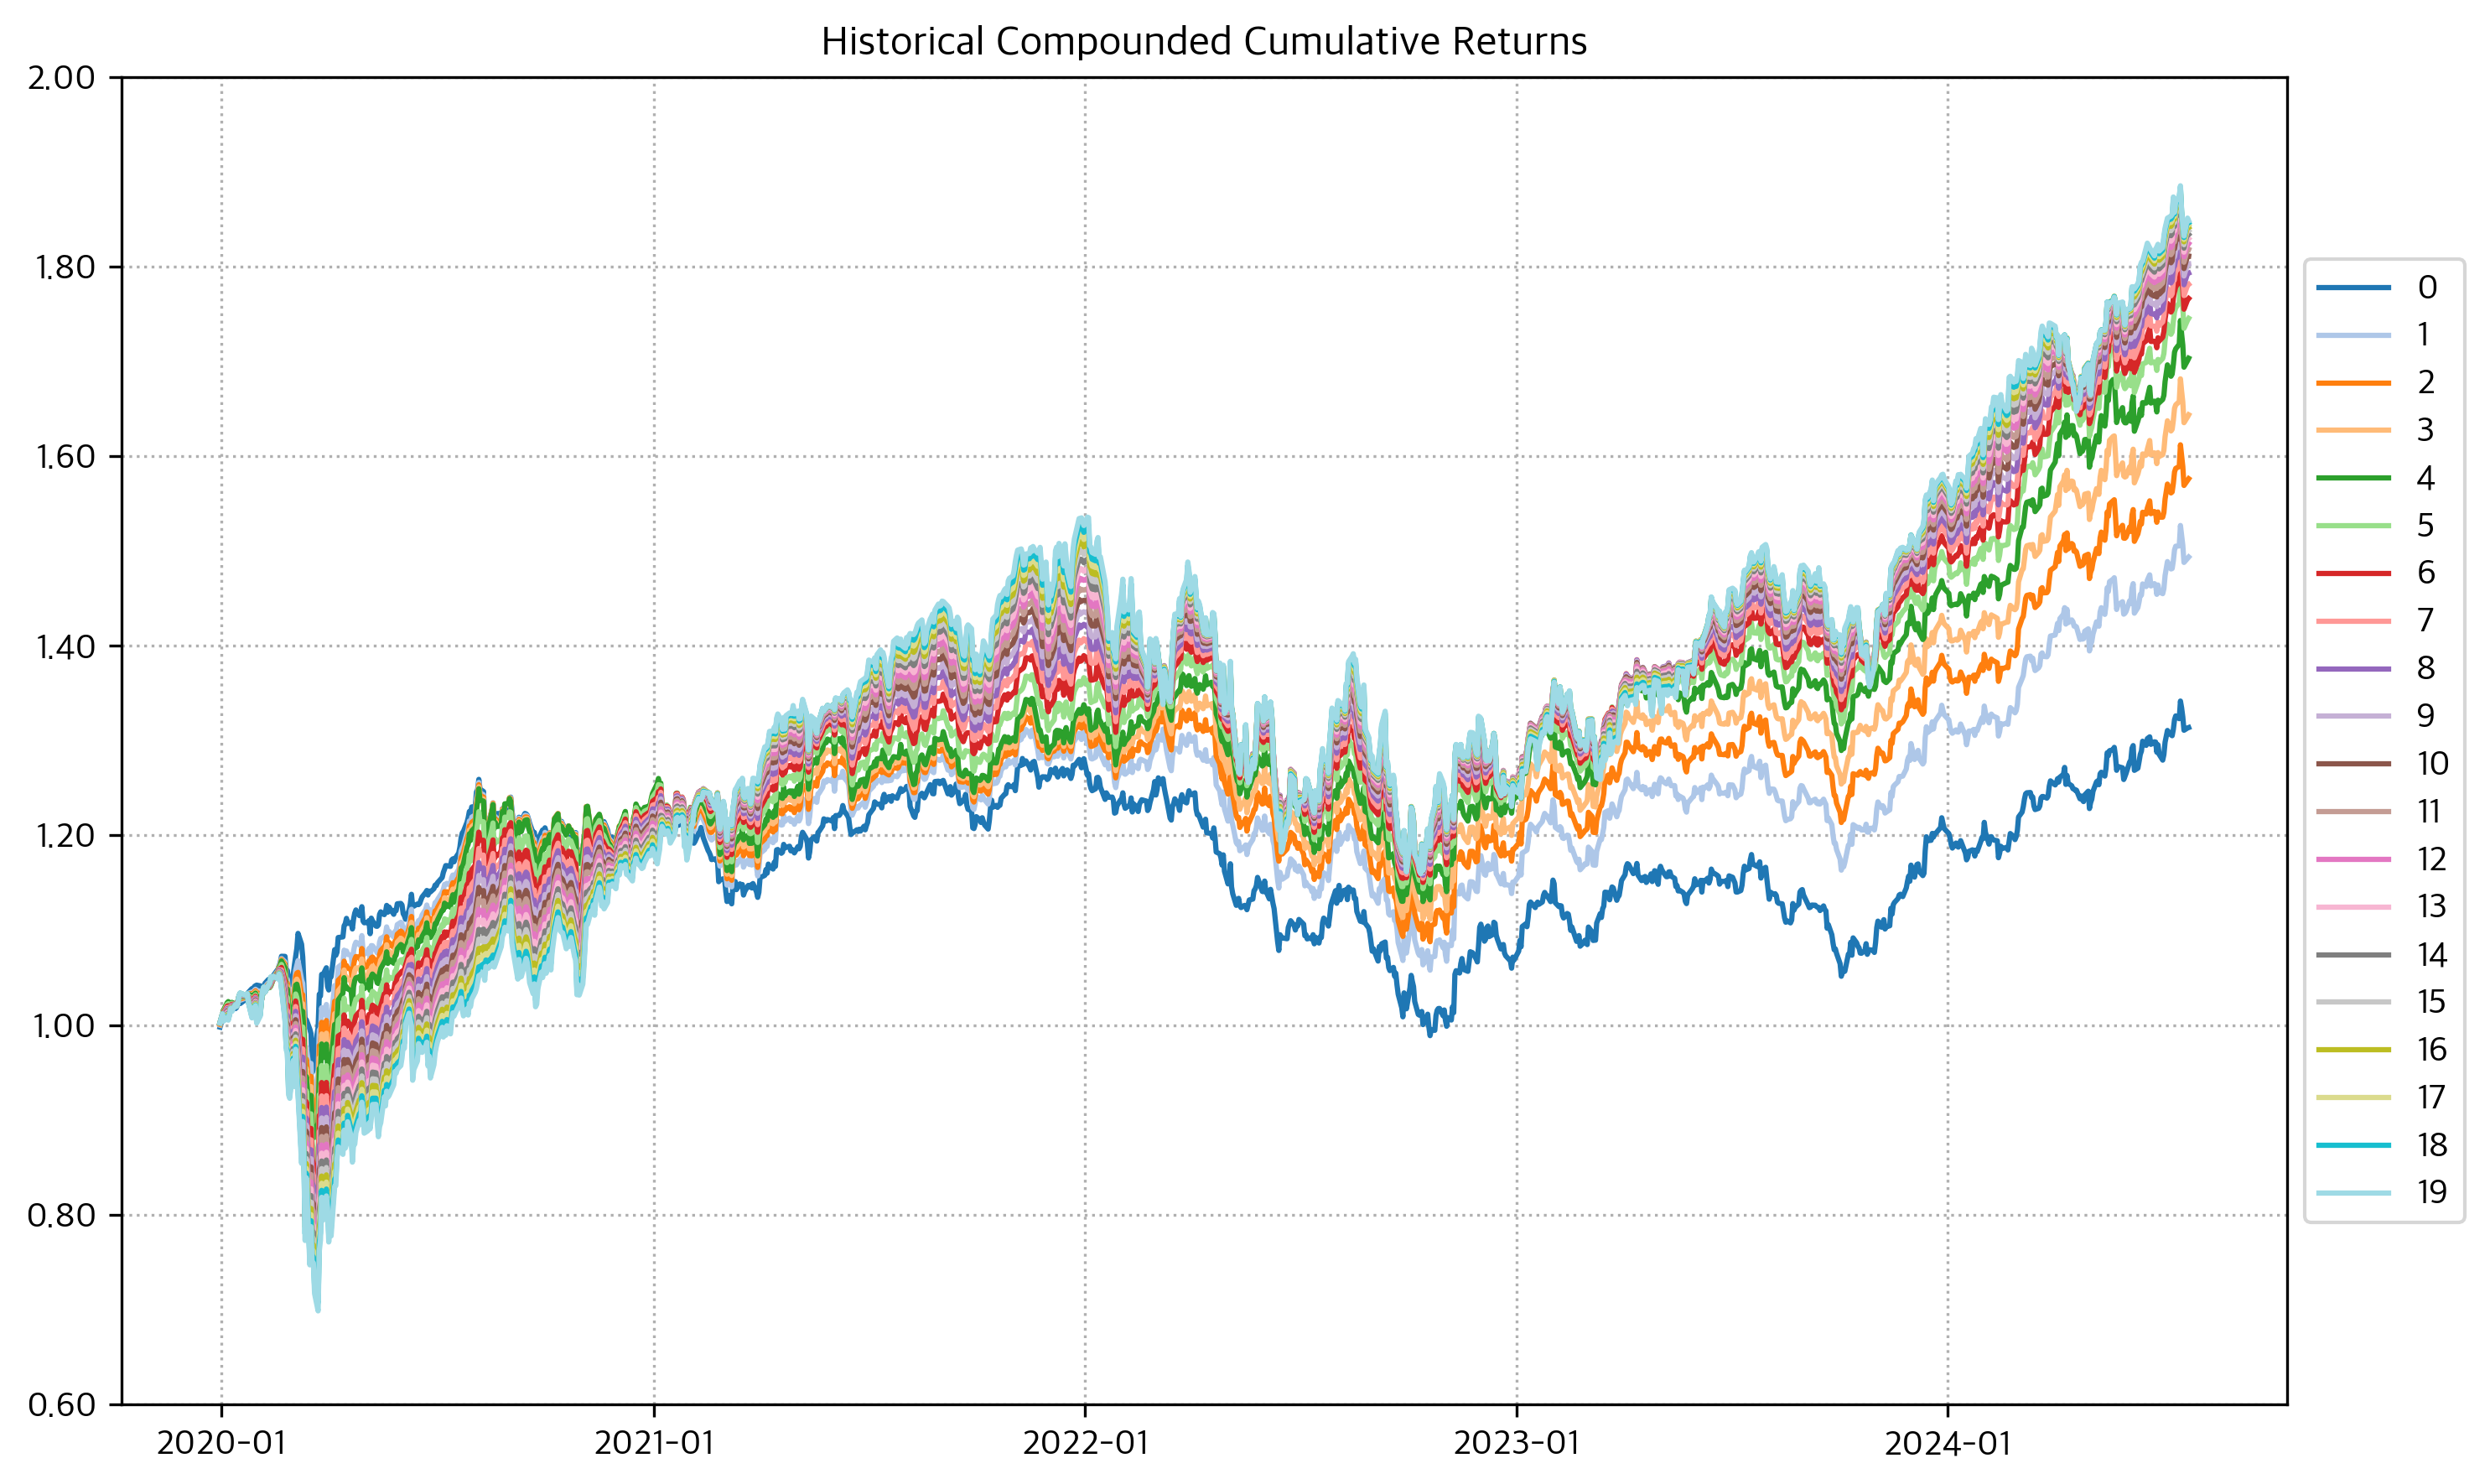

In [2]:
ax = rp.plot_series(returns=Y,
                    w=ws,
                    cmap='tab20',
                    height=6,
                    width=10,
                    ax=None)